In [1]:
###########################################
%matplotlib inline
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
### %pip install swigibp pandas etc..
###########################################
%pwd

'/home/david/projectos/voltrad1/notebooks'

In [ ]:
%pip install qgrid
#jupyter nbextension enable --py --sys-prefix qgrid

In [ ]:
#%pip install QuantLib-Python
import QuantLib as ql
from QuantLib import *
import matplotlib.pyplot as plt
%matplotlib inline
ql.__version__

In [ ]:
u = SimpleQuote(258)
# the length of rate which closest corresponds to the maturity of the option. 
# This will be true opportunity cost of having capital tied up in option positions 
#with regard to the risk free rate.
r = SimpleQuote(0.00073)
sigma = SimpleQuote(0.186779)

today = Date(20, November, 2017)
Settings.instance().evaluationDate = today
option = EuropeanOption(PlainVanillaPayoff(Option.Put, 229),
EuropeanExercise(Date(16, February, 2018)))

riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

process = BlackScholesProcess(QuoteHandle(u),
                                YieldTermStructureHandle(riskFreeCurve),
                                BlackVolTermStructureHandle(volatility))
engine = AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)
print(option.NPV() , option.delta(), option.gamma() , option.theta(), option.vega() )


In [ ]:
from valuations.opt_pricing_methods import *

bsm_price_and_greeks(underlying_price=258,irate=0.00073,sigma_amt=0.186779,
                     valuation_date="20171120",strike=229,expiration_date="20180216",
                     option_right_type="put",opt_val_type="european")


In [ ]:
import persist.sqlite_methods as pp

df= pp.get_yahoo_option_dataframe("SPY", "2019-12", "", "")
df.columns
df[df["Strike"]==206]
subset_df=df.iloc[(df['Strike'] - df['Underlying_Price']).abs().argsort()[:4]]
subset_df

In [ ]:
import persist.sqlite_methods as pp
import core.analytics_methods as an
df= pp.get_yahoo_underlying_dataframe(symbols=["FXE","UNG"])
an.sma(period=2,df=df,symbol="Close")
df

2019-12-31 14:01:55,017 - voltrad1 - INFO - Read config file [/home/david/.voltrad1]


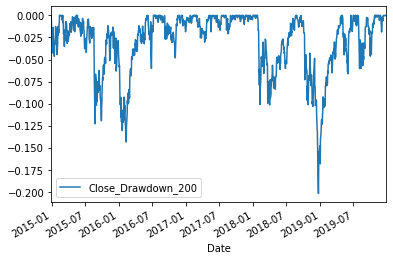

In [2]:
import persist.sqlite_methods as pp
import core.analytics_methods as an
df= pp.get_yahoo_underlying_dataframe(symbols=["SPY"])
an.drawdown(period=200,df=df,symbol="Close")
an.ReturnsTD(df=df,symbol="Close")
df[['Close_Drawdown_200']].plot()
df.to_excel("out2.xlsx")

In [ ]:
from datetime import date, timedelta

start_date = date(2016, 8, 1)
end_date = date(2022, 1, 1)

from dateutil.relativedelta import relativedelta

delta = relativedelta(months=+1)
while start_date <= end_date:
    print (start_date.strftime("%Y-%m"))
    df= pp.get_yahoo_option_dataframe("SPY", start_date.strftime("%Y-%m"), "", "")
    start_date += delta
    
#db_file = get_market_db_file(db_type, expiry_file)
#store = sqlite3.connect(path + db_file)
#symbols = dataframe[criteria["symbol"]].unique().tolist()
#log.info(("For expiry: ",expiry," these are the symbols included in the data to be loaded:  ", symbols))


In [ ]:
df.shape

In [ ]:
df2 = df[(df.Strike == 314.0) & (df.Type == "call")]
x_col = 'Quote_Time'
y_cols = ['Ask','Bid','Last']
df2=df2.loc[:,[x_col] + y_cols].dropna()
df2.loc[:,y_cols] \
    = df2.loc[:,y_cols].apply(pd.to_numeric, errors='coerce')
df2.loc[:,x_col]=pd.to_datetime(df2.loc[:,x_col], format="%Y-%m-%d %H:%M:%S")
df2.index = df2[x_col]
del df2[x_col]
df2.plot()

In [ ]:

##%pip install swigibpy

In [ ]:
import pandas_datareader.data as web
symbol="GOOG"
source1="yahoo"
import datetime
#option=web.YahooOptions(symbol, session=None)
#all_data = option.get_call_data()
#all_data

pd = web.DataReader(
name=symbol,
data_source=source1,
start=datetime.datetime(2019,12,27,0,0),
end=None,
retry_count=3,
pause=0.1,
session=None
)
pd

In [ ]:
from core import config
globalconf = config.GlobalConfig()
optchain_def = globalconf.get_tickers_optchain_yahoo()
optchain_def
#for _,symbol in optchain_def.iterrows():
#        print("x [%s]" % ( str(symbol) ))